Emotional arcs of Shakespeare
----------------------------------------------



In [1]:
from os import listdir, mkdir
from os.path import isfile, join, isdir
from json import loads
from re import findall,UNICODE
import sys
sys.path.append("/Users/andyreagan/tools/python")
from kitchentable.dogtoys import *
from labMTsimple.labMTsimple.speedy import LabMT
my_LabMT = LabMT()
from labMTsimple.labMTsimple.storyLab import *
import numpy as np
import pickle

import os
sys.path.append('/Users/andyreagan/projects/2014/09-books/database')
os.environ.setdefault('DJANGO_SETTINGS_MODULE','gutenbergdb.settings')
import django
django.setup()

from library.models import *
from bookclass import *

from tqdm import tqdm

In [2]:
# all our essentials
from matplotlib import rc,rcParams
rc('font', family='sans-serif') 
rc('font', serif='Helvetica Neue')
rc('text', usetex='false')

rc('font', family='serif')
rc('font', family='cmr10')
rc('text', usetex='true')
# this should accomplish the same thing
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{hyperref}'
rcParams['text.latex.unicode'] = True

rcParams.update({'font.size': 12})
import matplotlib.pyplot as plt
%matplotlib inline

# import matplotlib
# matplotlib.use("pgf")
# pgf_with_custom_preamble = {
#     "text.usetex": True,
#     "text.latex.unicode": True,
#     "pgf.preamble": [
#         r"\usepackage{hyperref}"
#         ]
# }
# matplotlib.rcParams.update(pgf_with_custom_preamble)
# matplotlib.rcParams.update({'font.size': 12})
# from matplotlib import pyplot as plt

In [3]:
plays = [1787,1533,2263,2235,2253,1128,1777,1110,1118,1134]
timeseries = []

In [4]:
for p in plays:
    b = Book.objects.get(gutenberg_id=p)
    b_data = Book_raw_data(b)
    print(b.txt_file_path)
    try:
        b_data.chopper_sliding(my_LabMT,num_points=200,stop_val=1.0,randomize=False,use_cache=True)
    except:
        print("couldn't find",b.title)
        pass
    # print(b_data.timeseries)
    timeseries.append(b_data.timeseries)

data/gutenberg/gutenberg-007/1787.txt
data/gutenberg/gutenberg-007/1533.txt
data/gutenberg/gutenberg-007/2263.txt
data/gutenberg/gutenberg-007/2235.txt
data/gutenberg/gutenberg-007/2253.txt
data/gutenberg/gutenberg-007/1128.txt
data/gutenberg/gutenberg-007/1777.txt
data/gutenberg/gutenberg-007/1110.txt
data/gutenberg/gutenberg-007/1118.txt
data/gutenberg/gutenberg-007/1134.txt


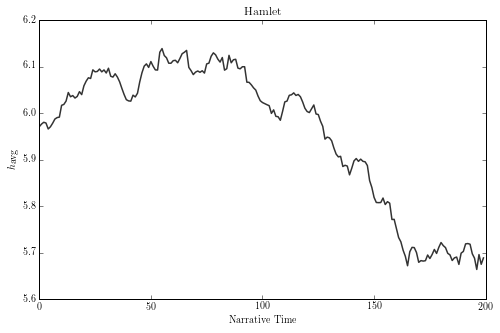

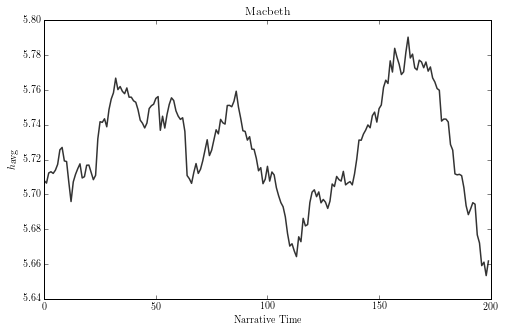

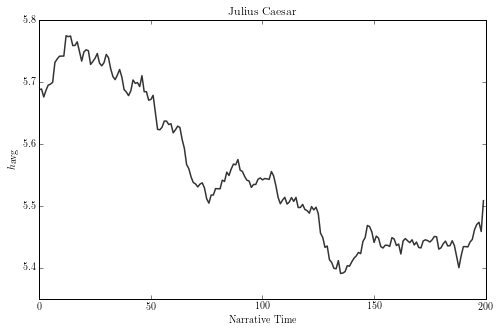

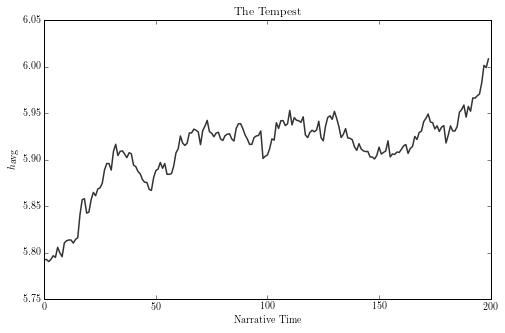

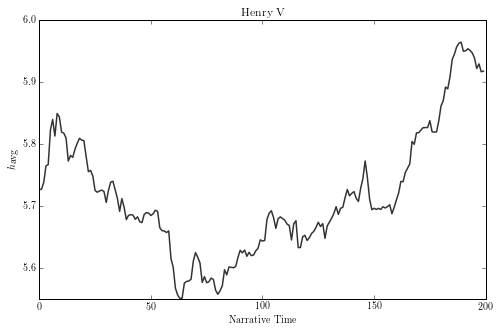

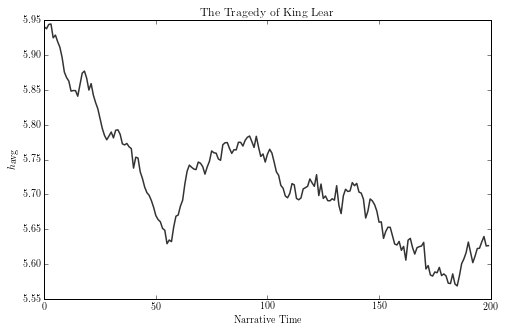

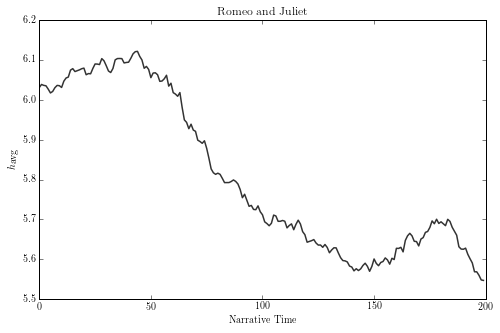

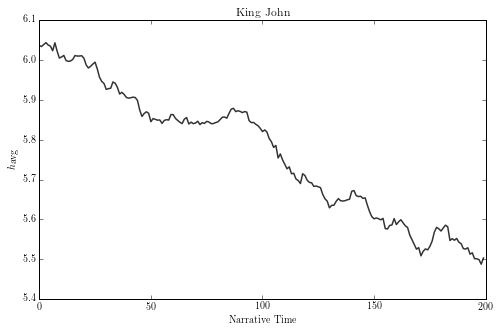

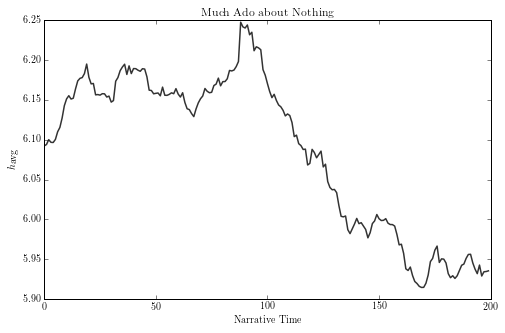

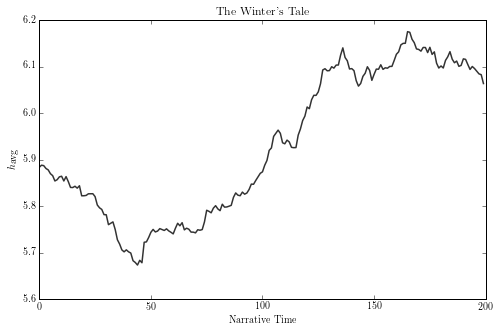

In [5]:
for i,t in enumerate(timeseries):
    if t is not None:
        plt.figure(figsize=(8,5))
        plt.plot(t,linewidth=1.5,color=".2")
        plt.ylabel(r"$h_{\textrm{avg}}$")
        plt.xlabel("Narrative Time")
        b = Book.objects.get(gutenberg_id=plays[i])
        plt.title(b.title)
        plt.savefig("../media/figures/all-timeseries/examples/{}.pdf".format(plays[i]),bbox_inches="tight")
        plt.savefig("../media/figures/all-timeseries/examples/{}.png".format(plays[i]),bbox_inches="tight",dpi=600)